In [21]:
import torch
import math
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
import scipy.stats
from tqdm import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [22]:
from nn_resampler import nn_resampler
from phase_est_smc import phase_est_smc

In [23]:
num_particles = 100 # number of SMC particles (num of w points)
num_samples = 10000 # number of samples to draw from the particle distribution (to be binned)
num_bins = 100 # number of bins
n_iters = 1000 # number of different omega*
t0 = 1 # starting time
max_iters = 50 # maximum number of iterations before breaking
if_print = True

In [24]:
net = nn_resampler(100,100)
net.load_state_dict(torch.load("model/nn_resampler.model"))
net.eval();

## NN Resampler

In [25]:
omega_star_list = []
nn_pred_list = []
nn_data = []

for i in range(n_iters): 
    
    omega_star = np.random.uniform(low=-1, high =1) * np.pi
    
    omega_star_list.append(omega_star)
    smc = phase_est_smc(omega_star, t0, max_iters)
    smc.init_particles(num_particles)
    resample_counts = 0
    
    while True:
        
        particle_pos, particle_wgts = smc.particles(threshold=num_particles/5, num_measurements=1)
        bins, edges = smc.get_bins(num_bins, num_samples)
        
        if smc.break_flag:
            break
            
        nn_pred = net(torch.tensor(bins).float().unsqueeze(0)) ## convert to float tensor, then make dim [1, num_bins]
        smc.nn_bins_to_particles(nn_pred.detach().numpy(), edges)
        
        resample_counts += 1

        
#         if len(running_est) > 5:
#             last_n = running_est[-5:]
#             # np.allclose(a,b) returns true if every element in a and b are equal to a tolerance
#             # np.full_like makes an array with shake of last_n with every element being last_n[0]
#             # if all elements of last_n are equal then they should all equal the first element
#             if np.allclose(last_n, np.full_like(last_n, last_n[0])):
#                 break
    if if_print:            
        print("True omega: {:f}, prediction by NN: {:f}, num of resample calls: {:d}".format(omega_star,
                                                                                             smc.curr_omega_est,
                                                                                             resample_counts))

    while len(smc.data) < max_iters:
        smc.data.append(smc.data[-1]) # append the last estimate
    
    nn_data.append(smc.data)
    nn_pred_list.append(smc.curr_omega_est)
    
    if np.abs(smc.curr_omega_est) - np.abs(omega_star) > 1:
        print("Prediction: {:f}, actual value: {:f}. Threshold exceeded. Breaking out of loop for inspection.".
             format(smc.curr_omega_est, omega_star))

True omega: -0.278489, prediction by NN: 0.276001, num of resample calls: 9
True omega: 1.590013, prediction by NN: 1.744837, num of resample calls: 7
True omega: 1.217836, prediction by NN: 1.173641, num of resample calls: 8
True omega: 2.858245, prediction by NN: 2.712913, num of resample calls: 10
True omega: -2.810460, prediction by NN: 2.777634, num of resample calls: 4
True omega: 0.144020, prediction by NN: 0.144113, num of resample calls: 3
True omega: -1.673508, prediction by NN: -1.544505, num of resample calls: 6
True omega: -0.298010, prediction by NN: 0.301855, num of resample calls: 4
True omega: 2.862810, prediction by NN: -2.556184, num of resample calls: 6
True omega: -1.377675, prediction by NN: -0.781569, num of resample calls: 4
True omega: 3.133072, prediction by NN: -1.709817, num of resample calls: 7
True omega: 1.447661, prediction by NN: -1.432252, num of resample calls: 2
True omega: -1.086383, prediction by NN: -1.073781, num of resample calls: 5
True omega: 

True omega: -0.433123, prediction by NN: 0.403603, num of resample calls: 5
True omega: -2.206594, prediction by NN: -1.869605, num of resample calls: 5
True omega: 2.158503, prediction by NN: -1.302096, num of resample calls: 7
True omega: 1.864936, prediction by NN: 1.765094, num of resample calls: 7
True omega: 2.901540, prediction by NN: 2.925746, num of resample calls: 3
True omega: -0.655063, prediction by NN: 0.626582, num of resample calls: 7
True omega: 2.217802, prediction by NN: -1.430607, num of resample calls: 4
True omega: -0.615669, prediction by NN: -0.481797, num of resample calls: 6
True omega: 1.317619, prediction by NN: -1.239837, num of resample calls: 5
True omega: 0.482071, prediction by NN: -0.474804, num of resample calls: 5
True omega: -1.598544, prediction by NN: 1.511062, num of resample calls: 3
True omega: 2.083263, prediction by NN: -1.935116, num of resample calls: 7
True omega: 2.375884, prediction by NN: 2.306646, num of resample calls: 6
True omega: -

True omega: 1.512789, prediction by NN: 1.500036, num of resample calls: 4
True omega: -0.695411, prediction by NN: 0.771336, num of resample calls: 4
True omega: 1.112632, prediction by NN: 0.281637, num of resample calls: 5
True omega: 0.191692, prediction by NN: 0.162894, num of resample calls: 9
True omega: 1.296125, prediction by NN: -1.221968, num of resample calls: 5
True omega: 0.165434, prediction by NN: -0.160105, num of resample calls: 6
True omega: 1.927910, prediction by NN: 1.934096, num of resample calls: 3
True omega: 2.081304, prediction by NN: 2.085180, num of resample calls: 2
True omega: -2.688529, prediction by NN: 2.658722, num of resample calls: 4
True omega: -0.918336, prediction by NN: 0.920823, num of resample calls: 5
True omega: -3.001348, prediction by NN: 2.869009, num of resample calls: 6
True omega: 2.159365, prediction by NN: -2.114155, num of resample calls: 6
True omega: 0.801834, prediction by NN: -0.784433, num of resample calls: 5
True omega: 1.980

True omega: 0.464314, prediction by NN: 0.449941, num of resample calls: 4
True omega: -1.985594, prediction by NN: -1.902885, num of resample calls: 5
True omega: 1.267908, prediction by NN: 1.212960, num of resample calls: 10
True omega: 2.009472, prediction by NN: 1.956282, num of resample calls: 9
True omega: 3.134932, prediction by NN: -2.834904, num of resample calls: 4
True omega: 2.134152, prediction by NN: -2.053387, num of resample calls: 9
True omega: -0.181213, prediction by NN: -0.182893, num of resample calls: 5
True omega: -0.879814, prediction by NN: 0.893718, num of resample calls: 5
True omega: 0.817791, prediction by NN: 0.891478, num of resample calls: 8
True omega: -2.190083, prediction by NN: -1.497006, num of resample calls: 5
True omega: 1.135590, prediction by NN: -0.736868, num of resample calls: 6
True omega: -2.115844, prediction by NN: -2.119090, num of resample calls: 4
True omega: -0.338096, prediction by NN: -0.322364, num of resample calls: 7
True omega

True omega: -2.617494, prediction by NN: 2.576607, num of resample calls: 4
True omega: 0.755994, prediction by NN: -0.700794, num of resample calls: 7
True omega: 1.004122, prediction by NN: -0.883250, num of resample calls: 5
True omega: 2.762584, prediction by NN: 2.613512, num of resample calls: 6
True omega: 0.925556, prediction by NN: -0.872876, num of resample calls: 8
True omega: 0.918922, prediction by NN: 0.808566, num of resample calls: 10
True omega: -0.792612, prediction by NN: -0.797770, num of resample calls: 6
True omega: 2.642221, prediction by NN: -2.651498, num of resample calls: 2
True omega: 1.588303, prediction by NN: 1.496177, num of resample calls: 5
True omega: -0.035151, prediction by NN: 0.028664, num of resample calls: 7
True omega: -0.608373, prediction by NN: 0.606943, num of resample calls: 3
True omega: 1.133046, prediction by NN: 1.066581, num of resample calls: 7
True omega: -1.354163, prediction by NN: -1.304371, num of resample calls: 7
True omega: -

True omega: -2.886929, prediction by NN: 2.659899, num of resample calls: 3
True omega: -2.423030, prediction by NN: 2.370356, num of resample calls: 4
True omega: 2.406815, prediction by NN: 2.414887, num of resample calls: 3
True omega: -2.335887, prediction by NN: 2.168593, num of resample calls: 8
True omega: 2.388699, prediction by NN: -2.431954, num of resample calls: 7
True omega: 0.809192, prediction by NN: -0.718993, num of resample calls: 4
True omega: 1.378146, prediction by NN: 1.377815, num of resample calls: 3
True omega: -3.014869, prediction by NN: -3.016871, num of resample calls: 2
True omega: 1.062873, prediction by NN: -1.044353, num of resample calls: 3
True omega: 0.852151, prediction by NN: -0.904319, num of resample calls: 3
True omega: -0.310773, prediction by NN: -0.282191, num of resample calls: 9
True omega: 0.854438, prediction by NN: 0.894691, num of resample calls: 7
True omega: 1.181635, prediction by NN: -1.142127, num of resample calls: 10
True omega: 

True omega: -0.944357, prediction by NN: 0.945158, num of resample calls: 4
True omega: 1.537981, prediction by NN: -1.399068, num of resample calls: 5
True omega: -0.951750, prediction by NN: -0.883526, num of resample calls: 4
True omega: 0.195295, prediction by NN: -0.200227, num of resample calls: 7
True omega: -1.109691, prediction by NN: 1.070626, num of resample calls: 8
True omega: -1.324564, prediction by NN: -1.308872, num of resample calls: 4
True omega: -2.150566, prediction by NN: -1.074231, num of resample calls: 11
True omega: 1.978270, prediction by NN: 1.973717, num of resample calls: 3
True omega: -1.945352, prediction by NN: 1.913452, num of resample calls: 2
True omega: 1.168260, prediction by NN: 1.179328, num of resample calls: 7
True omega: 1.642638, prediction by NN: -1.640195, num of resample calls: 3
True omega: 2.202383, prediction by NN: -1.374820, num of resample calls: 6
True omega: 1.924583, prediction by NN: -1.891573, num of resample calls: 10
True omeg

True omega: -3.049827, prediction by NN: -1.469566, num of resample calls: 5
True omega: 0.559976, prediction by NN: -0.522842, num of resample calls: 7
True omega: -0.773351, prediction by NN: 0.763127, num of resample calls: 4
True omega: 0.614361, prediction by NN: -0.615624, num of resample calls: 4
True omega: -0.951100, prediction by NN: -0.923407, num of resample calls: 8
True omega: -2.214298, prediction by NN: 2.348592, num of resample calls: 3
True omega: -2.971507, prediction by NN: -2.626383, num of resample calls: 5
True omega: -1.117912, prediction by NN: -1.080268, num of resample calls: 5
True omega: 0.575416, prediction by NN: -0.355705, num of resample calls: 7
True omega: -0.759315, prediction by NN: 0.731833, num of resample calls: 6
True omega: -1.742551, prediction by NN: 1.704460, num of resample calls: 4
True omega: 2.751313, prediction by NN: 2.498263, num of resample calls: 6
True omega: 0.206191, prediction by NN: -0.199431, num of resample calls: 4
True omeg

True omega: -0.678691, prediction by NN: -0.631934, num of resample calls: 8
True omega: -1.363510, prediction by NN: 1.267342, num of resample calls: 8
True omega: 1.283080, prediction by NN: 1.296593, num of resample calls: 6
True omega: -2.500385, prediction by NN: 2.414812, num of resample calls: 4
True omega: 0.351047, prediction by NN: -0.547955, num of resample calls: 15
True omega: 0.542943, prediction by NN: -0.541188, num of resample calls: 5
True omega: -2.336425, prediction by NN: -2.032772, num of resample calls: 10
True omega: 2.296676, prediction by NN: -1.001310, num of resample calls: 8
True omega: -2.034066, prediction by NN: 1.992515, num of resample calls: 2
True omega: 1.552808, prediction by NN: 1.461982, num of resample calls: 6
True omega: -1.779372, prediction by NN: -1.711347, num of resample calls: 3
True omega: -0.269781, prediction by NN: 0.331398, num of resample calls: 6
True omega: 0.359213, prediction by NN: -0.350820, num of resample calls: 5
True omeg

In [26]:
nn_mse = np.mean( np.abs(np.array(omega_star_list)) - np.abs(np.array(nn_pred_list)) ) ** 2
print(nn_mse)

0.021923102421549857


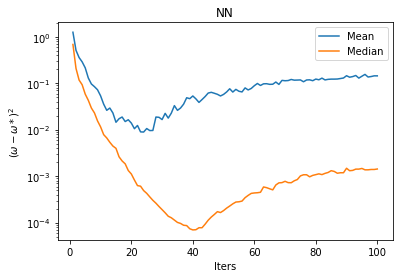

In [27]:
nn_data_squared = ( np.abs(np.array(nn_data)) - np.abs(np.array(omega_star_list)).reshape(-1,1)) ** 2 
nn_data_mean = np.mean(nn_data_squared, axis=0)
nn_data_median = np.median(nn_data_squared, axis =0)

num_data_points = nn_data_squared.shape[1]

plt.plot(np.arange(1,num_data_points+1, dtype=int), nn_data_mean, label='Mean')
plt.plot(np.arange(1,num_data_points+1, dtype=int), nn_data_median, label='Median')
plt.legend()
plt.title("NN")
plt.yscale('log')
plt.xlabel("Iters")
plt.ylabel("$(\omega - \omega*)^2$")
plt.show()

## Liu-West resampler

In [28]:
omega_star_list = []
lw_pred_list = []
lw_data = []

for i in range(n_iters): 
    omega_star = np.random.uniform(low=-1, high=1) * np.pi
    
    omega_star_list.append(omega_star)
    smc = phase_est_smc(omega_star, t0, max_iters)
    smc.init_particles(num_particles)
    
    resample_counts = 0
    
    while True:

        particle_pos, particle_wgts = smc.particles(threshold=num_particles/10, num_measurements=1)
        smc.liu_west_resample()
    
        resample_counts += 1 
        
        curr_omega_est = smc.particle_pos[np.argmax(smc.particle_wgts)]
        if smc.break_flag == True:
            break
        
#         if len(running_est) > 5:
#             last_5 = running_est[-5:]
#             # np.allclose(a,b) returns true if every element in a and b are equal to a tolerance
#             # np.full_like makes an array with shape of last_10 with every element being last_10[0]
#             # if all elements of last_10 are equal then they should all equal the first element
#             if np.allclose(last_5, np.full_like(last_5, last_5[0])):
#                 break
                
      
    if if_print:            
        print("True omega: {:f}, prediction by NN: {:f}, num of resample calls: {:d}".format(omega_star,
                                                                                             smc.curr_omega_est,
                                                                                             resample_counts))

    while len(smc.data) < max_iters:
        smc.data.append(smc.data[-1]) # append the last estimate

    lw_data.append(smc.data)
    lw_pred_list.append(smc.curr_omega_est)
    
    if np.abs(smc.curr_omega_est) - np.abs(omega_star) > 1:
        print("Prediction: {:f}, actual value: {:f}. Threshold exceeded. Breaking out of loop for inspection.".
             format(smc.curr_omega_est, omega_star))

    

True omega: 2.241945, prediction by NN: 3.460658, num of resample calls: 13
Prediction: 3.460658, actual value: 2.241945. Threshold exceeded. Breaking out of loop for inspection.
True omega: 1.597792, prediction by NN: -1.887834, num of resample calls: 13
True omega: -2.058012, prediction by NN: -1.641058, num of resample calls: 14
True omega: 2.012930, prediction by NN: 0.050082, num of resample calls: 14
True omega: -2.581405, prediction by NN: 1.625050, num of resample calls: 14
True omega: 2.926337, prediction by NN: 1.877431, num of resample calls: 13
True omega: 0.715970, prediction by NN: -0.679838, num of resample calls: 13
True omega: 1.667539, prediction by NN: -1.011701, num of resample calls: 14
True omega: -1.938633, prediction by NN: 2.400185, num of resample calls: 14
True omega: -1.746908, prediction by NN: 0.845269, num of resample calls: 13
True omega: 1.055281, prediction by NN: 1.531060, num of resample calls: 13
True omega: 1.161060, prediction by NN: -0.780532, nu

True omega: -0.361514, prediction by NN: -0.238397, num of resample calls: 13
True omega: -2.874586, prediction by NN: 2.911355, num of resample calls: 14
True omega: -0.822882, prediction by NN: 0.409311, num of resample calls: 13
True omega: -1.982343, prediction by NN: -1.745470, num of resample calls: 14
True omega: -0.734571, prediction by NN: 1.351927, num of resample calls: 13
True omega: 1.258727, prediction by NN: -0.612789, num of resample calls: 13
True omega: 2.707430, prediction by NN: 3.876548, num of resample calls: 14
Prediction: 3.876548, actual value: 2.707430. Threshold exceeded. Breaking out of loop for inspection.
True omega: 0.689951, prediction by NN: 0.774507, num of resample calls: 12
True omega: 0.844708, prediction by NN: -0.495614, num of resample calls: 12
True omega: 2.539200, prediction by NN: -2.353774, num of resample calls: 14
True omega: -2.737691, prediction by NN: -2.210834, num of resample calls: 14
True omega: 1.000361, prediction by NN: -1.044037

True omega: 0.007672, prediction by NN: -0.001401, num of resample calls: 9
True omega: -0.443898, prediction by NN: 0.280544, num of resample calls: 13
True omega: 1.465803, prediction by NN: 0.661620, num of resample calls: 13
True omega: 0.876767, prediction by NN: 0.802815, num of resample calls: 12
True omega: -1.512178, prediction by NN: 1.788887, num of resample calls: 12
True omega: -0.724347, prediction by NN: 0.777658, num of resample calls: 12
True omega: 0.683834, prediction by NN: 0.682124, num of resample calls: 14
True omega: -0.632668, prediction by NN: 0.586947, num of resample calls: 13
True omega: 0.809098, prediction by NN: 0.830247, num of resample calls: 13
True omega: 2.625783, prediction by NN: -1.210282, num of resample calls: 15
True omega: 0.759441, prediction by NN: 0.432263, num of resample calls: 13
True omega: -0.092781, prediction by NN: 0.053217, num of resample calls: 11
True omega: 3.087221, prediction by NN: -2.971301, num of resample calls: 13
True 

True omega: -2.396394, prediction by NN: -2.835891, num of resample calls: 13
True omega: 0.656742, prediction by NN: -0.708525, num of resample calls: 13
True omega: 2.107441, prediction by NN: 0.474245, num of resample calls: 14
True omega: -0.433403, prediction by NN: -0.500938, num of resample calls: 12
True omega: -1.932234, prediction by NN: -0.153413, num of resample calls: 15
True omega: 2.145713, prediction by NN: 2.294106, num of resample calls: 12
True omega: 0.839164, prediction by NN: 1.113749, num of resample calls: 12
True omega: -0.717639, prediction by NN: -0.428151, num of resample calls: 12
True omega: 2.693448, prediction by NN: -2.172974, num of resample calls: 14
True omega: 0.438328, prediction by NN: -0.211865, num of resample calls: 12
True omega: 1.473830, prediction by NN: -1.009604, num of resample calls: 14
True omega: 0.971960, prediction by NN: -0.873836, num of resample calls: 12
True omega: -0.809510, prediction by NN: 1.447038, num of resample calls: 1

True omega: -2.072890, prediction by NN: -2.794387, num of resample calls: 13
True omega: -2.929882, prediction by NN: -0.642546, num of resample calls: 14
True omega: 2.692950, prediction by NN: -3.000621, num of resample calls: 14
True omega: 1.526591, prediction by NN: -1.718813, num of resample calls: 13
True omega: 1.594436, prediction by NN: 1.094280, num of resample calls: 14
True omega: 0.117693, prediction by NN: -0.099778, num of resample calls: 12
True omega: 2.721499, prediction by NN: 4.392090, num of resample calls: 14
Prediction: 4.392090, actual value: 2.721499. Threshold exceeded. Breaking out of loop for inspection.
True omega: 2.144044, prediction by NN: -1.315889, num of resample calls: 13
True omega: -1.066529, prediction by NN: -1.118703, num of resample calls: 12
True omega: 0.910515, prediction by NN: 1.162520, num of resample calls: 12
True omega: -1.881635, prediction by NN: -2.029543, num of resample calls: 13
True omega: -2.464973, prediction by NN: -3.05058

True omega: -0.053647, prediction by NN: 0.068047, num of resample calls: 12
True omega: 1.269249, prediction by NN: 1.267184, num of resample calls: 13
True omega: 0.104647, prediction by NN: 0.090590, num of resample calls: 11
True omega: -1.579744, prediction by NN: 0.217366, num of resample calls: 14
True omega: -1.524702, prediction by NN: -1.287336, num of resample calls: 12
True omega: 3.032416, prediction by NN: 3.324187, num of resample calls: 14
True omega: 0.860573, prediction by NN: 0.307161, num of resample calls: 13
True omega: 2.409421, prediction by NN: 6.079896, num of resample calls: 14
Prediction: 6.079896, actual value: 2.409421. Threshold exceeded. Breaking out of loop for inspection.
True omega: -1.846843, prediction by NN: -1.818459, num of resample calls: 14
True omega: 2.727606, prediction by NN: -5.612014, num of resample calls: 13
Prediction: -5.612014, actual value: 2.727606. Threshold exceeded. Breaking out of loop for inspection.
True omega: 1.188469, pred

True omega: -0.692797, prediction by NN: -0.687301, num of resample calls: 13
True omega: -2.286381, prediction by NN: 2.130964, num of resample calls: 13
True omega: -0.396157, prediction by NN: -0.441012, num of resample calls: 13
True omega: -1.855471, prediction by NN: -1.016190, num of resample calls: 14
True omega: 0.806930, prediction by NN: -0.229093, num of resample calls: 13
True omega: 2.316765, prediction by NN: -1.424346, num of resample calls: 14
True omega: 1.952469, prediction by NN: -1.508425, num of resample calls: 15
True omega: 0.257789, prediction by NN: -0.125200, num of resample calls: 11
True omega: 2.006391, prediction by NN: 1.473444, num of resample calls: 14
True omega: -1.260524, prediction by NN: 1.381429, num of resample calls: 13
True omega: -0.108027, prediction by NN: -0.134048, num of resample calls: 11
True omega: 2.400498, prediction by NN: 2.183224, num of resample calls: 14
True omega: -2.424842, prediction by NN: -3.304794, num of resample calls:

True omega: 0.944312, prediction by NN: 0.679215, num of resample calls: 13
True omega: -0.927488, prediction by NN: -1.304638, num of resample calls: 13
True omega: -2.771657, prediction by NN: -3.492051, num of resample calls: 13
True omega: 1.676524, prediction by NN: 2.175130, num of resample calls: 13
True omega: 0.284722, prediction by NN: 0.397219, num of resample calls: 12
True omega: 2.967927, prediction by NN: -1.824349, num of resample calls: 14
True omega: 1.540678, prediction by NN: -1.521920, num of resample calls: 15
True omega: 1.788837, prediction by NN: 0.668000, num of resample calls: 13
True omega: 0.512609, prediction by NN: -0.563925, num of resample calls: 12
True omega: -1.884752, prediction by NN: -1.964632, num of resample calls: 14
True omega: -2.332080, prediction by NN: -0.778903, num of resample calls: 13
True omega: 2.575287, prediction by NN: 2.046445, num of resample calls: 14
True omega: 2.727116, prediction by NN: 0.479812, num of resample calls: 13
T

True omega: -2.528783, prediction by NN: 3.732360, num of resample calls: 13
Prediction: 3.732360, actual value: -2.528783. Threshold exceeded. Breaking out of loop for inspection.
True omega: 1.741803, prediction by NN: 1.722815, num of resample calls: 14
True omega: -2.318546, prediction by NN: -2.360335, num of resample calls: 14
True omega: -1.612545, prediction by NN: 1.323070, num of resample calls: 14
True omega: 2.014458, prediction by NN: -0.900379, num of resample calls: 14
True omega: 0.569734, prediction by NN: 0.580187, num of resample calls: 12
True omega: 2.334465, prediction by NN: 2.383367, num of resample calls: 14
True omega: -2.066172, prediction by NN: 1.947672, num of resample calls: 14
True omega: -1.532578, prediction by NN: 0.114000, num of resample calls: 12
True omega: 0.569910, prediction by NN: 0.215564, num of resample calls: 13
True omega: -2.373481, prediction by NN: 1.691990, num of resample calls: 13
True omega: -1.091890, prediction by NN: 1.152654, n

True omega: 1.030279, prediction by NN: 0.701103, num of resample calls: 14
True omega: -1.783752, prediction by NN: 1.741636, num of resample calls: 13
True omega: 2.250290, prediction by NN: 2.918419, num of resample calls: 13
True omega: 0.873931, prediction by NN: 1.174680, num of resample calls: 14
True omega: 0.088336, prediction by NN: -0.074746, num of resample calls: 12
True omega: -2.356908, prediction by NN: -2.043926, num of resample calls: 13
True omega: 1.820778, prediction by NN: -0.996858, num of resample calls: 13
True omega: -2.062143, prediction by NN: 1.366671, num of resample calls: 13
True omega: 0.605021, prediction by NN: 0.437228, num of resample calls: 12
True omega: -1.230721, prediction by NN: 1.043913, num of resample calls: 13
True omega: 2.478386, prediction by NN: 2.478715, num of resample calls: 12
True omega: 2.721206, prediction by NN: -1.382828, num of resample calls: 14
True omega: 1.325672, prediction by NN: 2.265746, num of resample calls: 14
True

In [29]:
lw_mse = np.mean( np.abs(np.array(omega_star_list)) - np.abs(np.array(lw_pred_list))) ** 2
print(lw_mse)

0.020887781337050212


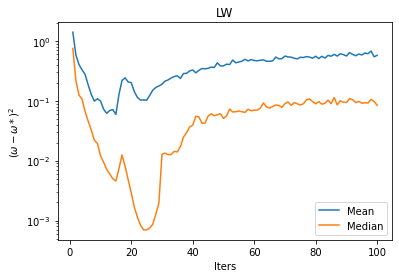

In [30]:
lw_data_squared = ( np.abs(np.array(lw_data)) - np.abs(np.array(omega_star_list)).reshape(-1,1)) ** 2 
lw_data_mean = np.mean(lw_data_squared, axis=0)
lw_data_median = np.median(lw_data_squared, axis =0)

num_data_points = lw_data_squared.shape[1]

plt.plot(np.arange(1,num_data_points+1, dtype=int), lw_data_mean, label='Mean')
plt.plot(np.arange(1,num_data_points+1, dtype=int), lw_data_median, label='Median')
plt.legend()
plt.title("LW")
plt.xlabel("Iters")
plt.ylabel("$(\omega - \omega*)^2$")
plt.yscale('log')
plt.show()